#Preprocessing

In [ ]:
# Import packages needed
import numpy as np
import pandas as pd
import io
from google.colab import files

In [ ]:
# Note: Works for me in Chrome, not Safari. Spotify takes about 3 minutes, billboard about 30
uploaded = files.upload()

Saving spotify_data.csv to spotify_data.csv


In [ ]:
# Read data into dataframe
#df = pd.read_csv('spotify_data.csv')
df = pd.read_csv('spotify_data.csv')

In [ ]:
df2 = df.copy()

In [ ]:
df2.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
df2.head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928


In [ ]:
df2['duration_min'] = df2['duration_ms'] / 60000

In [ ]:
df2.head(1)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_min
0,0.995,['Carl Woitschach'],0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928,2.644133


In [ ]:
explicit_numbers =[df2[df2['explicit'] == 0].shape[0], df2[df2['explicit'] == 1].shape[0]]

#Ungrouped Features

In [ ]:
import matplotlib.pyplot as plt

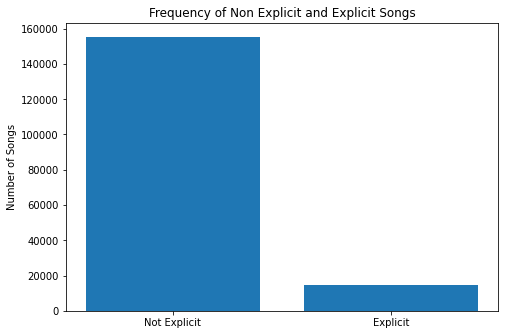

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
explicit_values = ['Not Explicit', 'Explicit']
ax.bar(explicit_values, explicit_numbers)
ax.set_ylabel('Number of Songs')
ax.set_title('Frequency of Non Explicit and Explicit Songs')
plt.show()

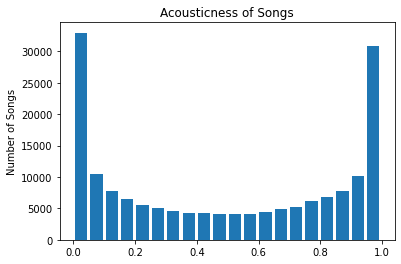

In [ ]:
plt.figure()
data = df2['acousticness']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Acousticness of Songs')
plt.show()

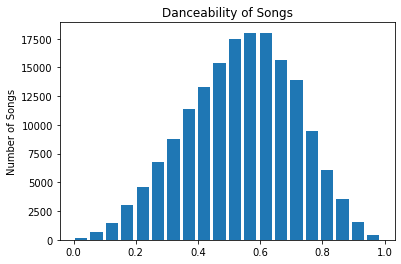

In [ ]:
plt.figure()
data = df2['danceability']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Danceability of Songs')
plt.show()

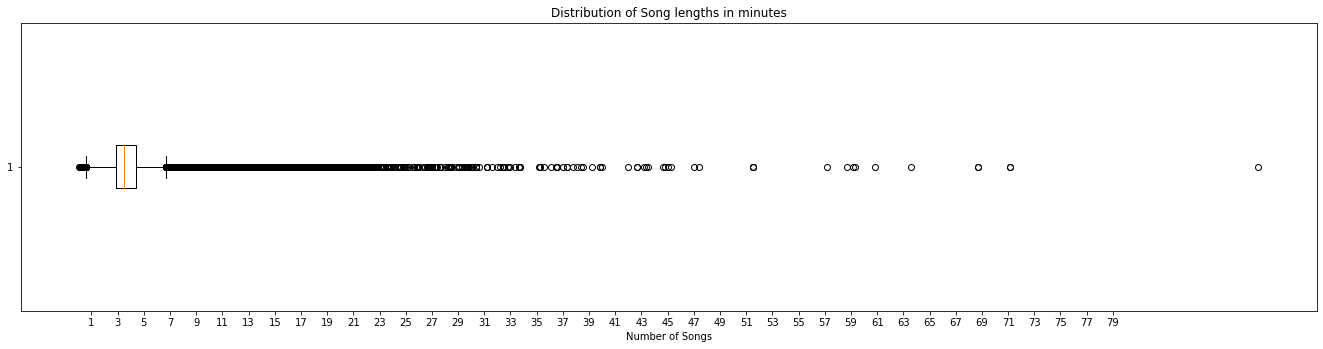

In [ ]:
data = df2['duration_min']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.boxplot(data, vert=False)
ax.set_xlabel('Number of Songs')
ax.set_title('Distribution of Song lengths in minutes')
ax.set_xticks(range(1,81,2))
plt.show()

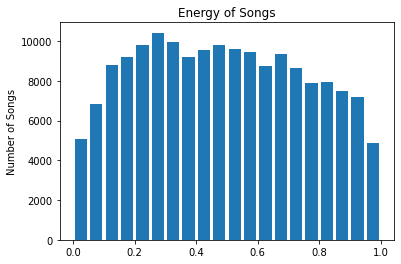

In [ ]:
plt.figure()
data = df2['energy']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Energy of Songs')
plt.show()

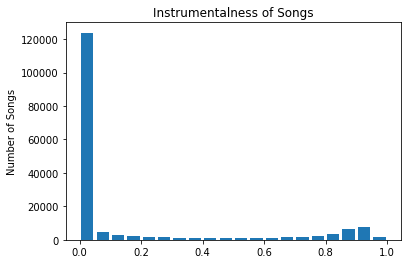

In [ ]:
plt.figure()
data = df2['instrumentalness']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Instrumentalness of Songs')
plt.show()

In [ ]:
keys = []
for i in range(12):
  keys.append(df2[df2['key'] == i].shape[0])

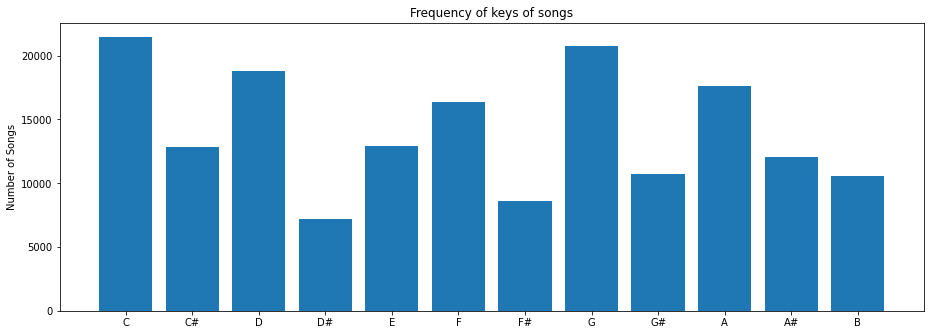

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(range(12), keys)
ax.set_xticks(range(12))
ax.set_ylabel('Number of Songs')
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_title('Frequency of keys of songs')
plt.show()

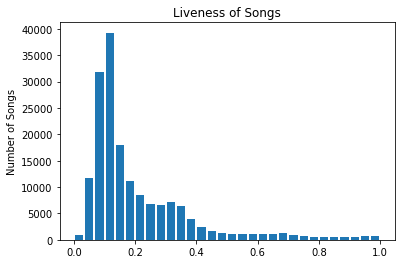

In [ ]:
plt.figure()
data = df2['liveness']
plt.hist(data, bins = 30, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Liveness of Songs')
plt.show()

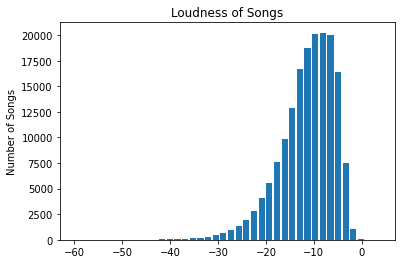

In [ ]:
plt.figure()
data = df2['loudness']
plt.hist(data, bins = 40, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Loudness of Songs')
plt.show()

In [ ]:
mode_numbers =[df2[df2['mode'] == 0].shape[0], df2[df2['mode'] == 1].shape[0]]

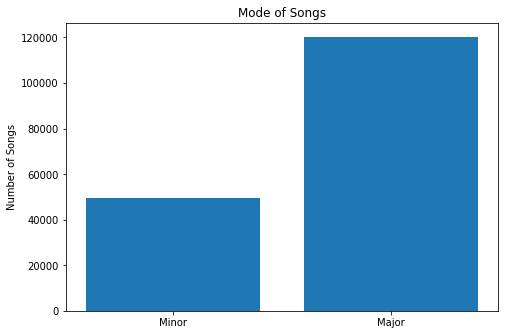

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mode_values = ['Minor', 'Major']
ax.bar(mode_values, mode_numbers)
ax.set_ylabel('Number of Songs')
ax.set_title('Mode of Songs')
plt.show()

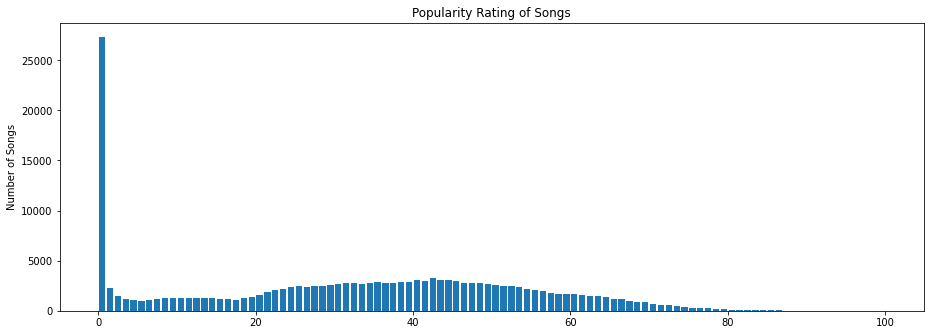

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
data = df2['popularity']
ax.hist(data, bins = 100, rwidth = 0.8)
ax.set_ylabel('Number of Songs')
ax.set_title('Popularity Rating of Songs')
plt.show()

In [ ]:
years = []
for i in range(1921, 2021):
  years.append(df2[df2['year'] == i].shape[0])

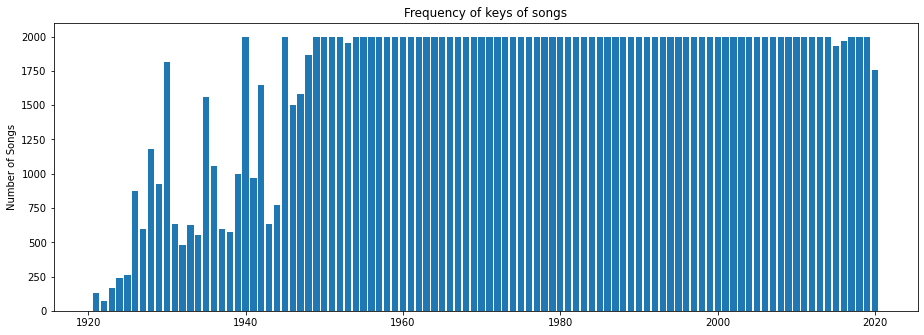

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(range(1921,2021), years)
ax.set_ylabel('Number of Songs')
ax.set_title('Frequency of keys of songs')
plt.show()

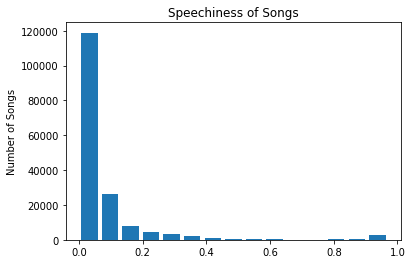

In [ ]:
plt.figure()
data = df2['speechiness']
plt.hist(data, bins = 15, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Speechiness of Songs')
plt.show()

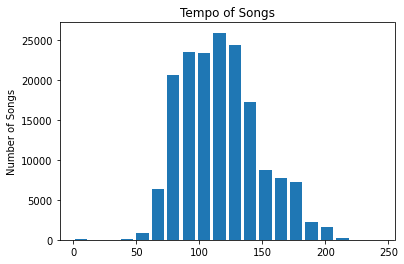

In [ ]:
plt.figure()
data = df2['tempo']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Tempo of Songs')
plt.show()

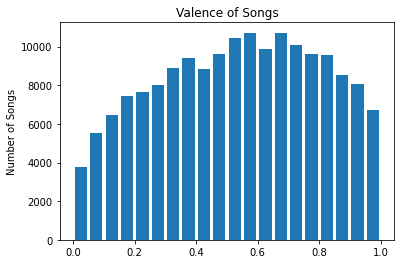

In [ ]:
plt.figure()
data = df2['valence']
plt.hist(data, bins = 20, rwidth = 0.8)
plt.ylabel('Number of Songs')
plt.title('Valence of Songs')
plt.show()

# Features by Key

In [ ]:
df_key = df2.groupby(['key']).mean()
df_key

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
key,,,,,,,,,,,,,,,
0,0.508403,0.536750,230917.729569,0.467961,0.067585,0.162900,0.208637,-11.661048,0.808084,30.821620,0.088345,117.070061,0.533156,1976.134843,3.848629
1,0.427154,0.561916,233047.475265,0.516190,0.182038,0.155235,0.201061,-10.924916,0.737203,34.787687,0.130615,115.943490,0.507301,1981.783942,3.884125
2,0.472527,0.524936,234952.958982,0.503690,0.064927,0.162224,0.209423,-11.253273,0.781893,31.897296,0.082340,118.135614,0.527171,1977.638011,3.915883
3,0.669181,0.500900,226397.617119,0.395299,0.037439,0.214486,0.191412,-12.612775,0.778984,24.518859,0.082386,115.186329,0.503133,1968.559081,3.773294
4,0.467659,0.526094,232356.269329,0.511972,0.069577,0.154332,0.214909,-11.121191,0.570002,33.168331,0.079860,117.750651,0.521222,1978.950313,3.872604
5,0.573989,0.532763,231980.497490,0.444584,0.057603,0.181856,0.206511,-12.019218,0.661239,28.589128,0.085983,115.529881,0.536747,1973.243389,3.866342
6,0.432668,0.557759,230076.756580,0.523900,0.135570,0.148074,0.206156,-10.704469,0.579432,34.766830,0.118053,115.665898,0.528210,1981.507803,3.834613
7,0.491670,0.540108,228491.254950,0.484844,0.071301,0.157950,0.214733,-11.473241,0.804741,31.294455,0.086560,117.270373,0.545706,1976.833791,3.808188
8,0.534134,0.537434,230560.875829,0.471417,0.092522,0.173493,0.192129,-11.449905,0.815517,30.595089,0.094374,116.028858,0.524856,1976.243955,3.842681


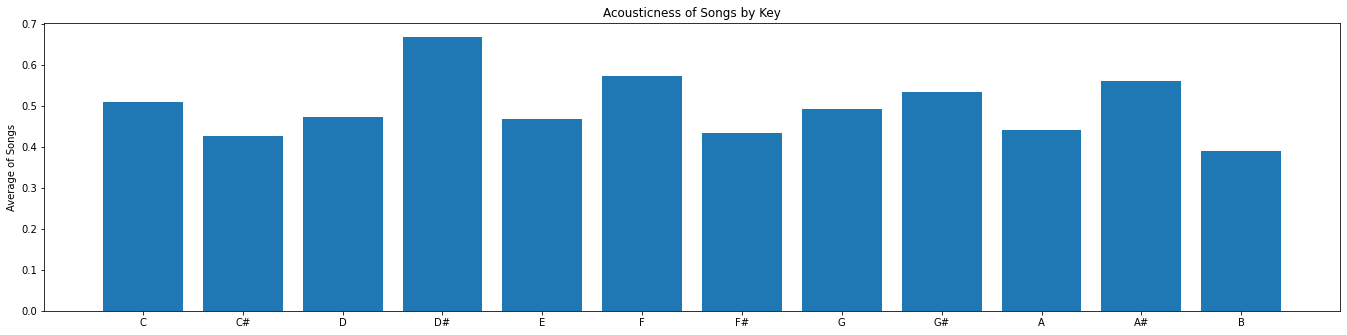

In [ ]:
data = df_key['acousticness']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_ylabel('Average of Songs')
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_title('Acousticness of Songs by Key')
plt.show()

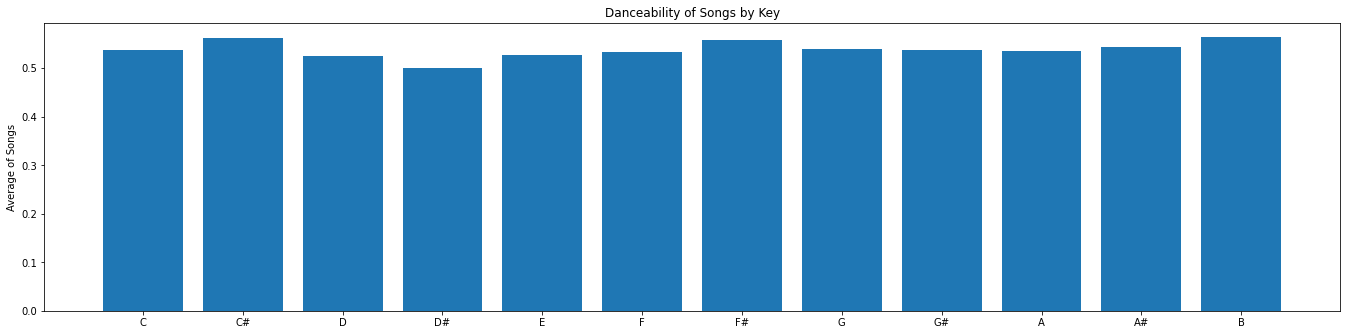

In [ ]:
data = df_key['danceability']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Danceability of Songs by Key')
plt.show()

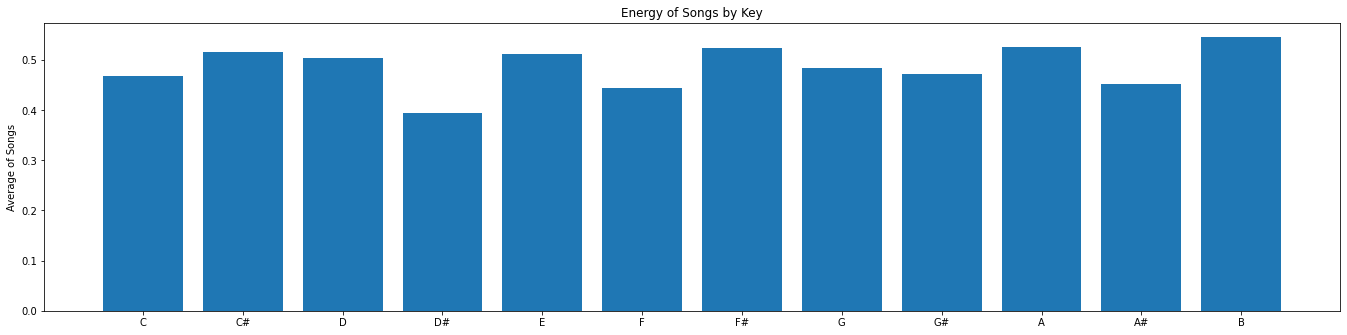

In [ ]:
data = df_key['energy']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Energy of Songs by Key')
plt.show()

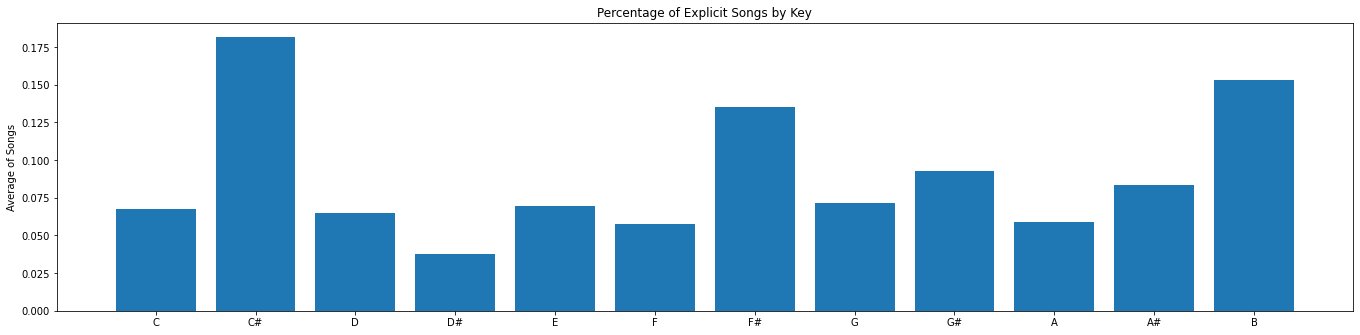

In [ ]:
data = df_key['explicit']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Percentage of Explicit Songs by Key')
plt.show()

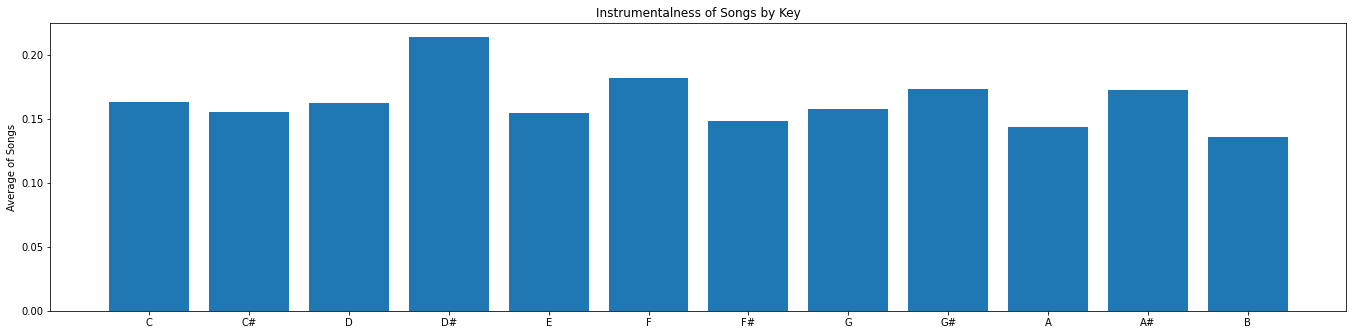

In [ ]:
data = df_key['instrumentalness']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Instrumentalness of Songs by Key')
plt.show()

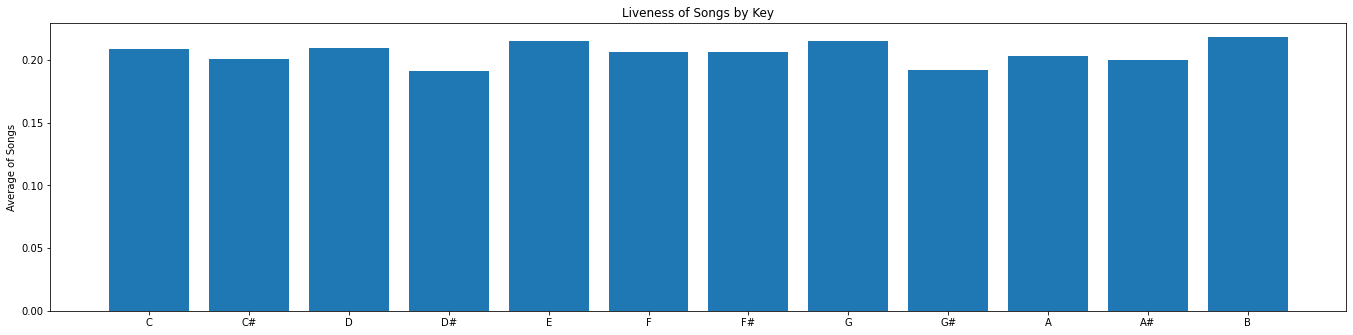

In [ ]:
data = df_key['liveness']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Liveness of Songs by Key')
plt.show()

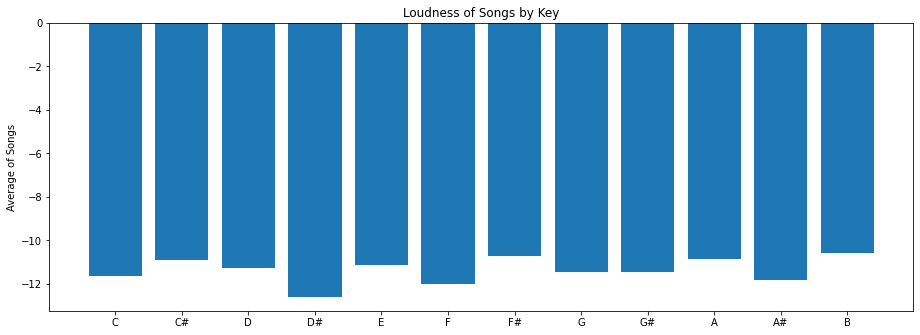

In [ ]:
data = df_key['loudness']
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Loudness of Songs by Key')
plt.show()

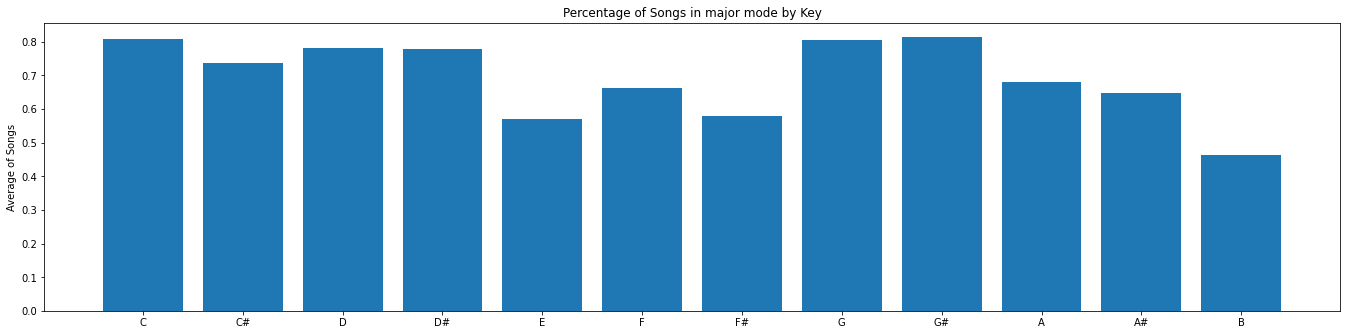

In [ ]:
data = df_key['mode']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Percentage of Songs in major mode by Key')
plt.show()

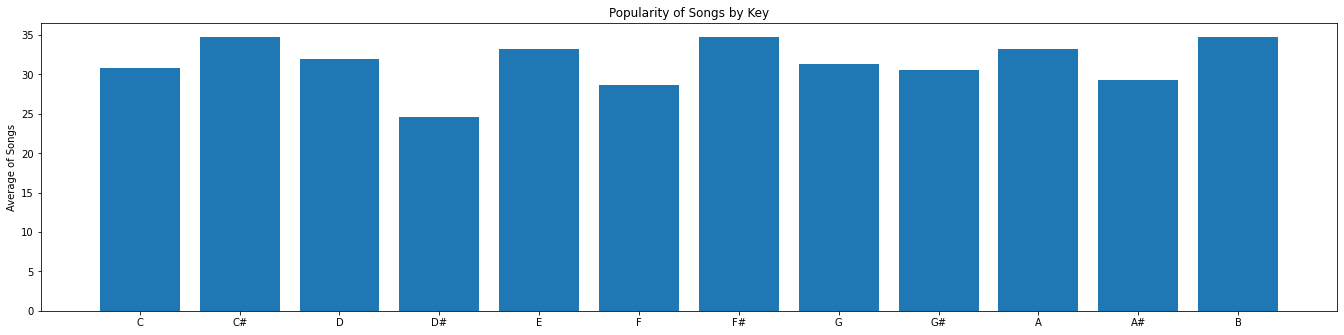

In [ ]:
data = df_key['popularity']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Popularity of Songs by Key')
plt.show()

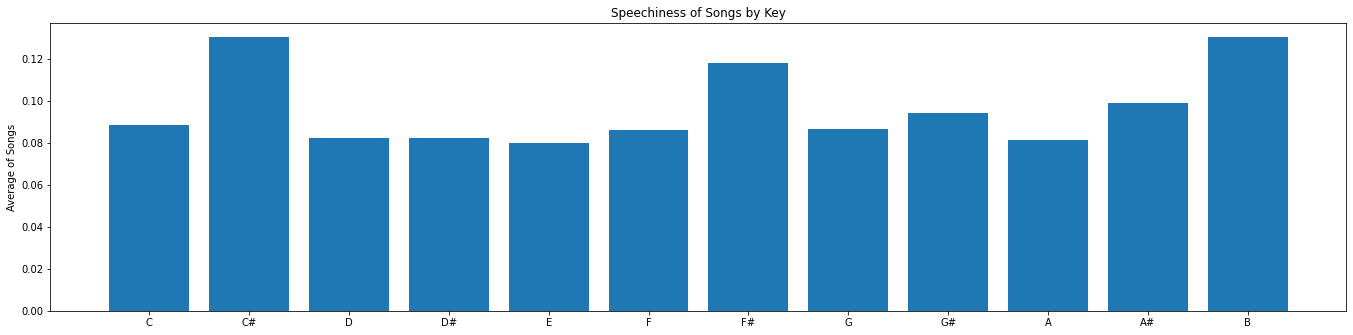

In [ ]:
data = df_key['speechiness']
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Speechiness of Songs by Key')
plt.show()

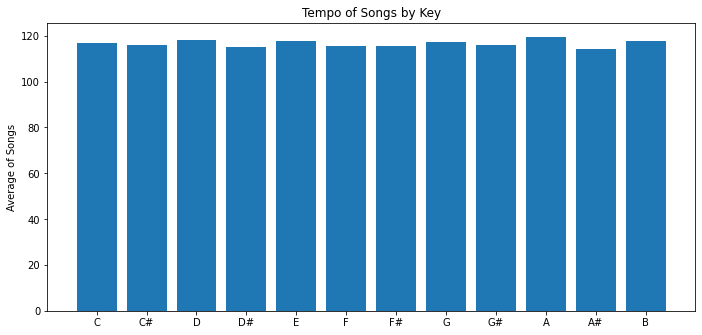

In [ ]:
data = df_key['tempo']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Tempo of Songs by Key')
plt.show()

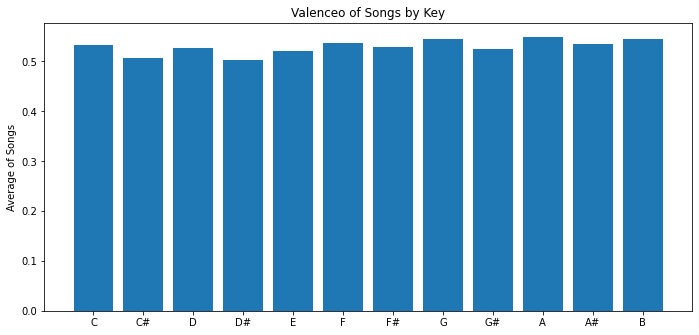

In [ ]:
data = df_key['valence']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average of Songs')
ax.set_title('Valenceo of Songs by Key')
plt.show()

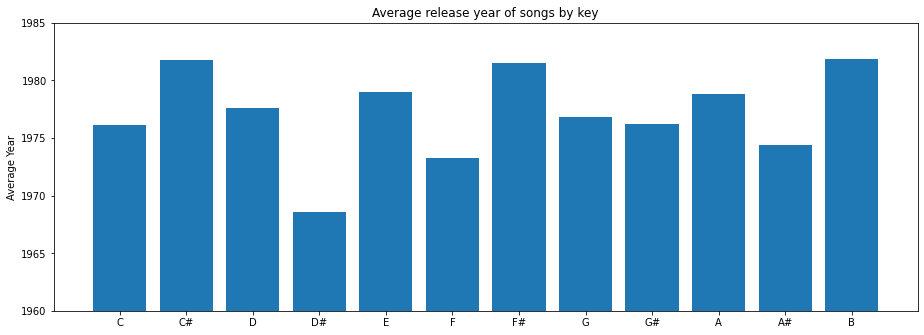

In [ ]:
data = df_key['year']
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(range(12), data)
ax.set_xticks(range(12))
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
ax.set_ylabel('Average Year')
ax.set_ybound(1960,1985)
ax.set_title('Average release year of songs by key')
plt.show()

# Features by Explicit Label

In [ ]:
df_ex = df2.groupby(['explicit']).mean()
df_ex

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_min
explicit,,,,,,,,,,,,,,,
0,0.522310,0.525234,233024.746485,0.476976,0.174964,5.191337,0.204576,-11.633786,0.720072,30.149842,0.075197,116.840566,0.533879,1975.312026,3.883746
1,0.179454,0.677433,213951.815937,0.613873,0.021462,5.299535,0.229490,-8.528820,0.584368,46.726749,0.297443,118.106735,0.512856,1997.833067,3.565864


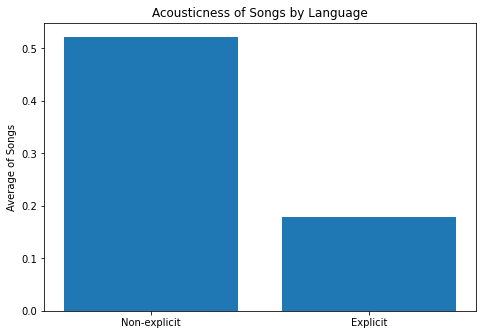

In [ ]:
data = df_ex['acousticness']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Acousticness of Songs by Language')
plt.show()

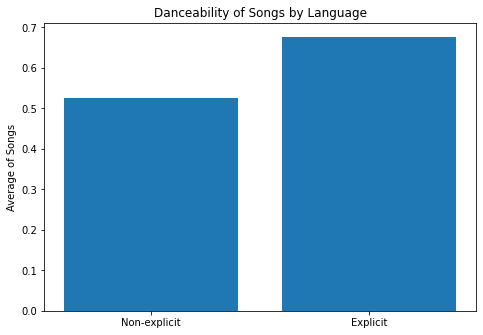

In [ ]:
data = df_ex['danceability']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Danceability of Songs by Language')
plt.show()

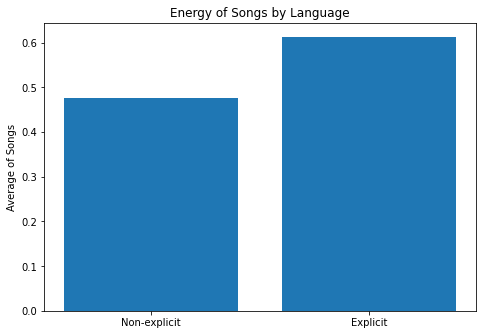

In [ ]:
data = df_ex['energy']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Energy of Songs by Language')
plt.show()

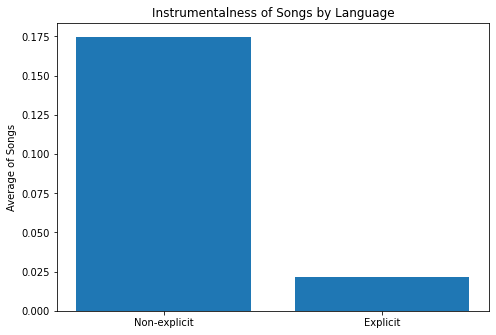

In [ ]:
data = df_ex['instrumentalness']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Instrumentalness of Songs by Language')
plt.show()

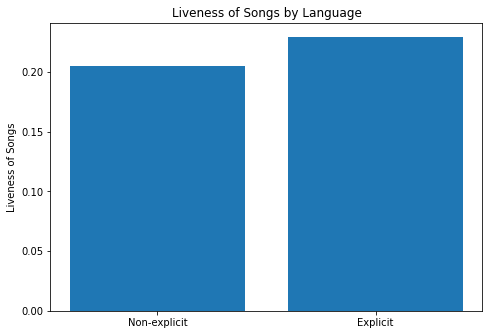

In [ ]:
data = df_ex['liveness']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Liveness of Songs')
ax.set_title('Liveness of Songs by Language')
plt.show()

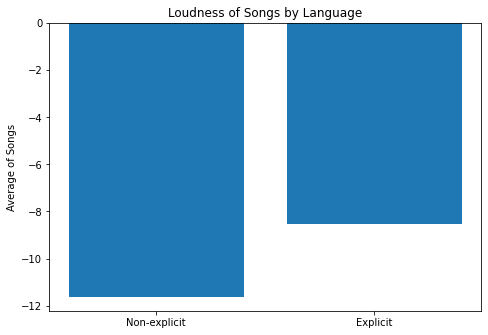

In [ ]:
data = df_ex['loudness']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Loudness of Songs by Language')
plt.show()

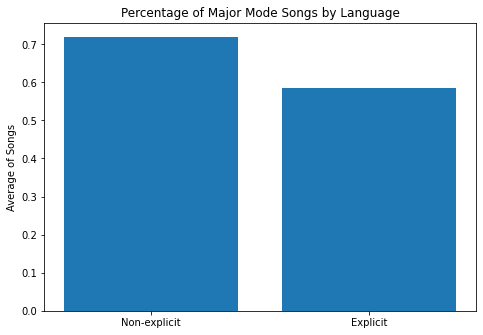

In [ ]:
data = df_ex['mode']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Percentage of Major Mode Songs by Language')
plt.show()

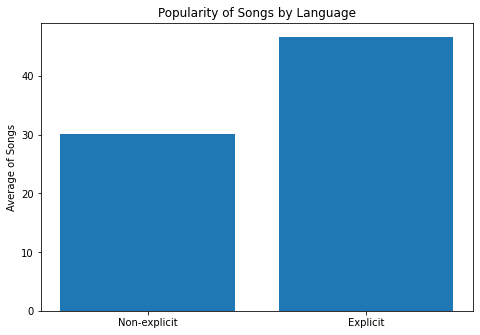

In [ ]:
data = df_ex['popularity']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Popularity of Songs by Language')
plt.show()

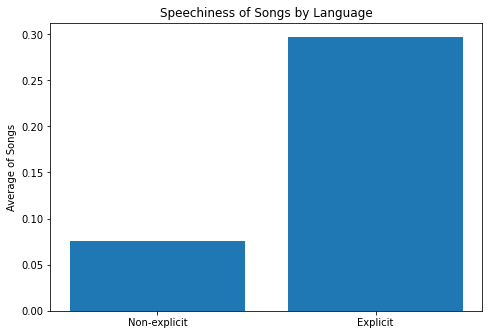

In [ ]:
data = df_ex['speechiness']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Speechiness of Songs by Language')
plt.show()

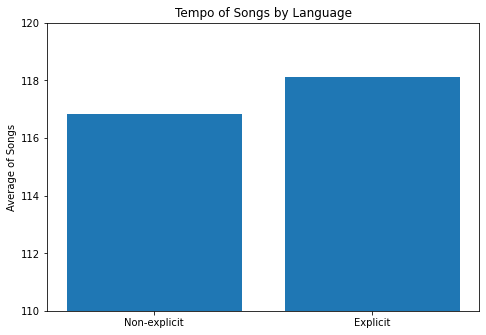

In [ ]:
data = df_ex['tempo']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_ybound(110,120)
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Tempo of Songs by Language')
plt.show()

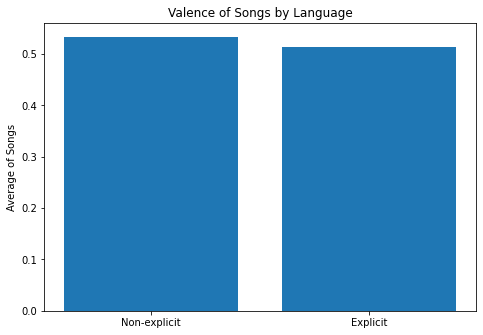

In [ ]:
data = df_ex['valence']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Valence of Songs by Language')
plt.show()

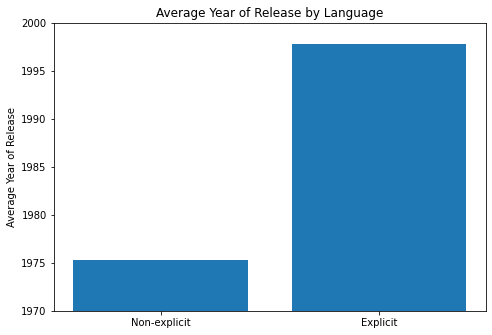

In [ ]:
data = df_ex['year']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ybound(1970,2000)
ax.set_ylabel('Average Year of Release')
ax.set_title('Average Year of Release by Language')
plt.show()

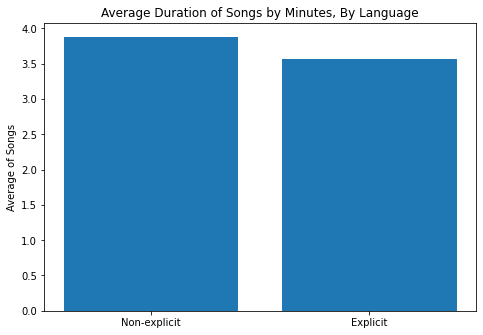

In [ ]:
data = df_ex['duration_min']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2), data)
ax.set_xticks(range(2))
ax.set_xticklabels(['Non-explicit', 'Explicit'])
ax.set_ylabel('Average of Songs')
ax.set_title('Average Duration of Songs by Minutes, By Language')
plt.show()

# Features by Year

In [ ]:
df_year = df2.groupby(['year']).mean()
df_year

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,duration_min
year,,,,,,,,,,,,,,,
1921,0.895823,0.425661,229911.914062,0.236784,0.054688,0.322330,5.031250,0.215814,-17.095438,0.656250,0.351562,0.077258,100.397758,0.425495,3.831865
1922,0.939236,0.480000,167904.541667,0.237026,0.000000,0.440470,5.236111,0.238647,-19.179958,0.625000,0.138889,0.115419,101.376139,0.534056,2.798409
1923,0.976329,0.568462,178356.301775,0.246936,0.000000,0.401932,4.846154,0.236656,-14.373882,0.775148,5.727811,0.098619,112.456598,0.624788,2.972605
1924,0.935575,0.548654,188461.649789,0.347033,0.000000,0.583955,5.637131,0.237875,-14.202304,0.751055,0.603376,0.090210,120.653359,0.668574,3.141027
1925,0.965422,0.571890,184130.699620,0.264373,0.000000,0.408893,5.171103,0.243094,-14.516707,0.718631,2.707224,0.115457,115.671715,0.616430,3.068845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.280290,0.599976,219400.763840,0.592877,0.333164,0.074646,5.225495,0.180198,-7.949913,0.638903,61.371254,0.107298,119.070344,0.430769,3.656679
2017,0.289916,0.612286,209343.613000,0.586739,0.349000,0.098209,5.073000,0.194218,-8.422697,0.624500,64.861500,0.111752,116.840278,0.414465,3.489060
2018,0.271941,0.664930,200919.119000,0.590591,0.468000,0.035948,5.347500,0.171781,-7.253666,0.613000,67.276000,0.128140,122.004325,0.447141,3.348652


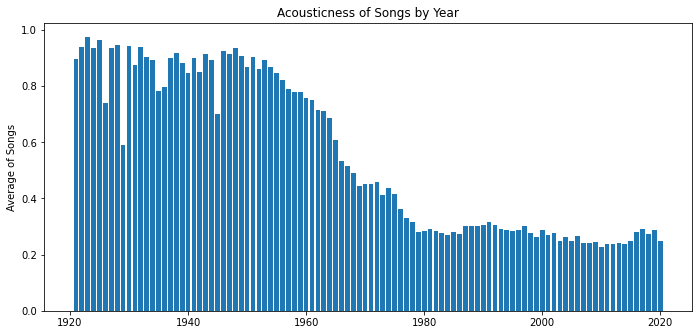

In [ ]:
data = df_year['acousticness']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Acousticness of Songs by Year')
plt.show()

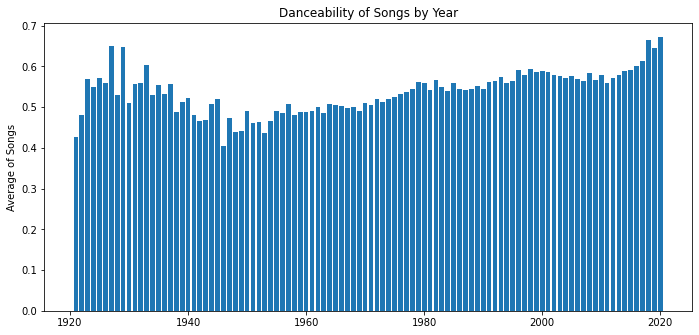

In [ ]:
data = df_year['danceability']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Danceability of Songs by Year')
plt.show()

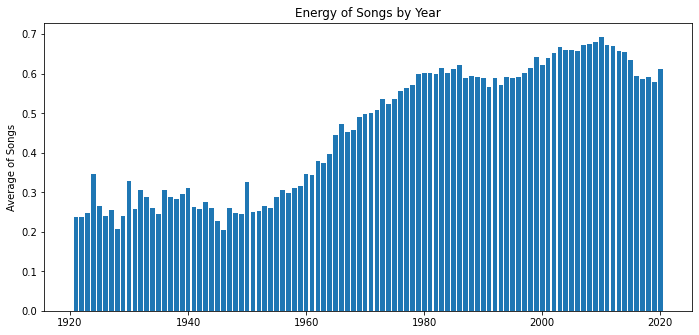

In [ ]:
data = df_year['energy']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Energy of Songs by Year')
plt.show()

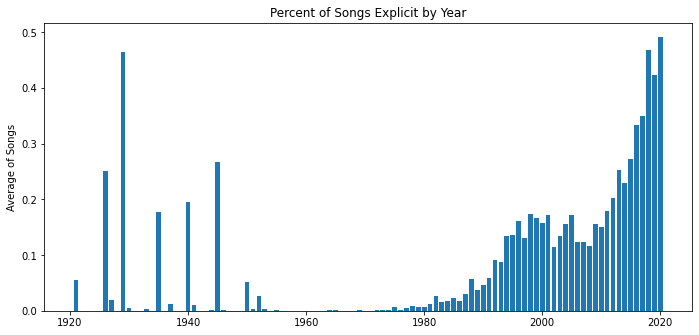

In [ ]:
data = df_year['explicit']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Percent of Songs Explicit by Year')
plt.show()

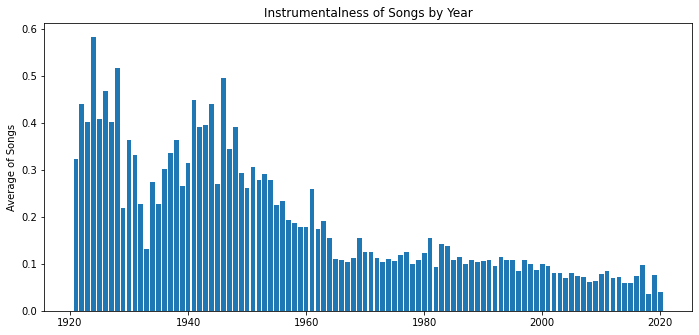

In [ ]:
data = df_year['instrumentalness']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Instrumentalness of Songs by Year')
plt.show()

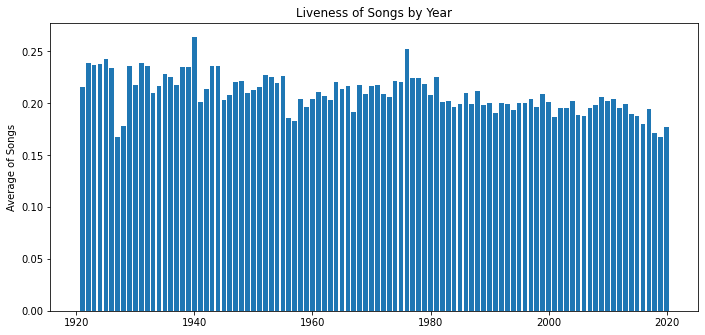

In [ ]:
data = df_year['liveness']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Liveness of Songs by Year')
plt.show()

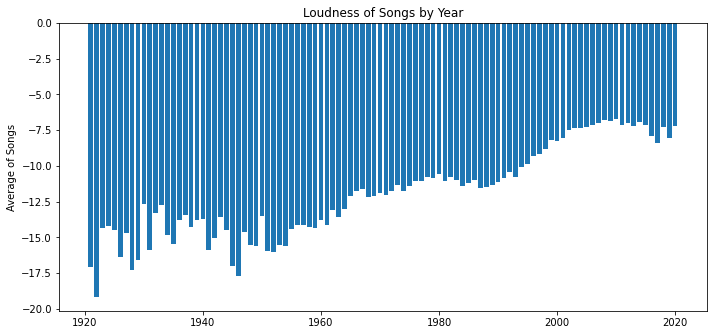

In [ ]:
data = df_year['loudness']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Loudness of Songs by Year')
plt.show()

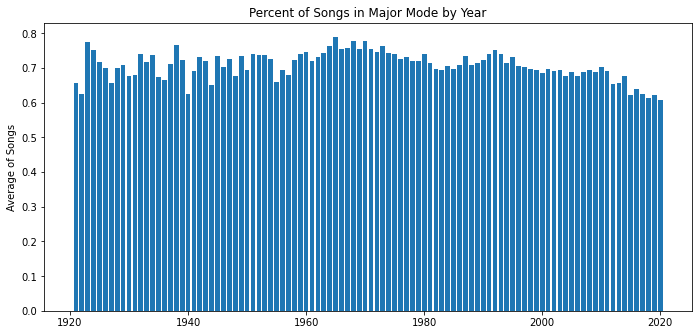

In [ ]:
data = df_year['mode']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Percent of Songs in Major Mode by Year')
plt.show()

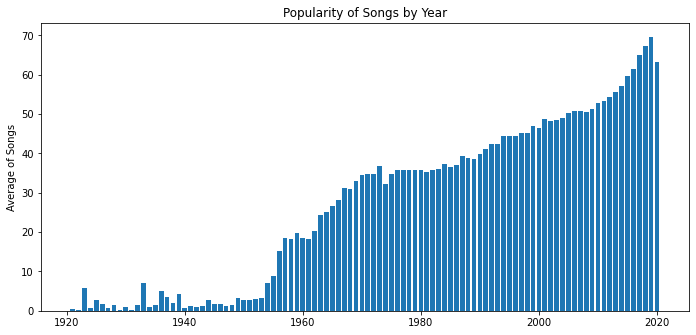

In [ ]:
data = df_year['popularity']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Popularity of Songs by Year')
plt.show()

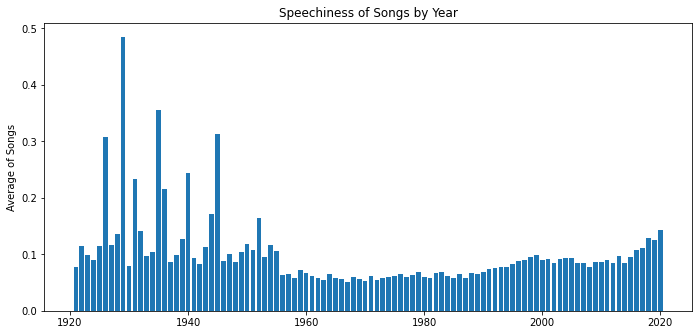

In [ ]:
data = df_year['speechiness']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Speechiness of Songs by Year')
plt.show()

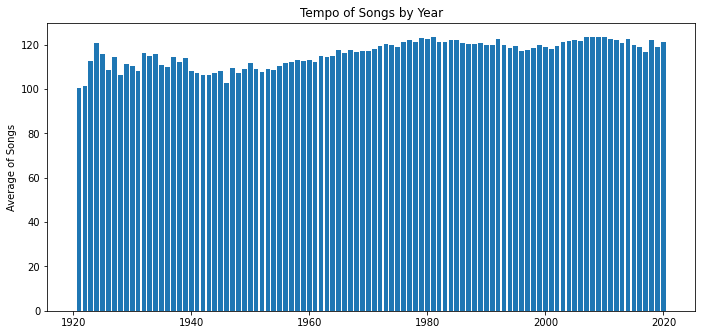

In [ ]:
data = df_year['tempo']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Tempo of Songs by Year')
plt.show()

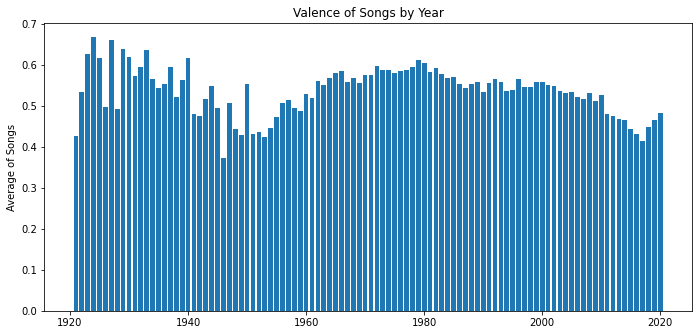

In [ ]:
data = df_year['valence']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Valence of Songs by Year')
plt.show()

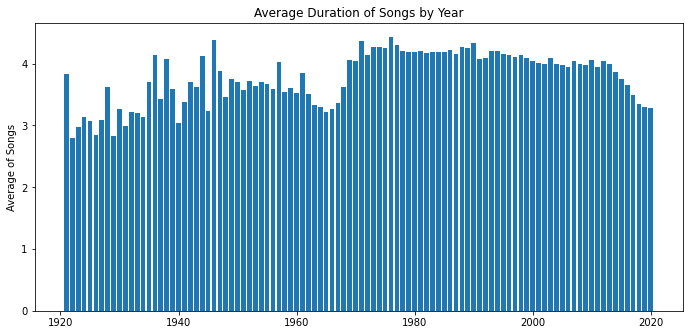

In [ ]:
data = df_year['duration_min']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
ax.bar(range(1921,2021), data)
ax.set_ylabel('Average of Songs')
ax.set_title('Average Duration of Songs by Year')
plt.show()